### Project Objectives

For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

 - Use seaborn and Matplotlib to create visualizations
 - Become familiar with presenting and sharing data visualizations
 - Preprocess, explore, and analyze data
 
**Prerequisites:**
- Data Acquisition
- Data Visualization
- Hypothesis Testing
- Summarizing Quantitative Data
- Data Wrangling and Tidying
- Data Manipulation with Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
# what are the countries we are analyzing?
countries = df.Country.unique()
countries

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [5]:
# what years are we looking into
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [6]:
# what is the average/typical gdp for each country
c_g= df.groupby('Country').agg({'GDP': 'mean'})
c_g.reset_index()

,Country,GDP
0,Chile,1.697888e+11
1,China,4.957714e+12
2,Germany,3.094776e+12
3,Mexico,9.766506e+11
4,United States of America,1.407500e+13
5,Zimbabwe,9.062580e+09


In [7]:
# what is the average/typical life expectancy for each country
c_life= df.groupby('Country').agg({'Life expectancy at birth (years)': 'mean'})
c_life.reset_index()

,Country,Life expectancy at birth (years)
0,Chile,78.94375
1,China,74.26250
2,Germany,79.65625
3,Mexico,75.71875
4,United States of America,78.06250
5,Zimbabwe,50.09375


### VISUALIZATION

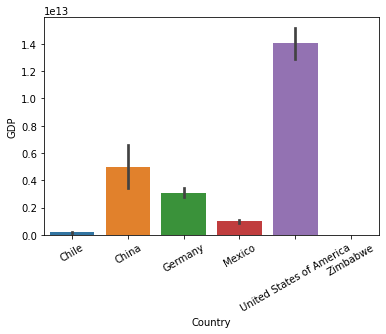

<Figure size 432x288 with 0 Axes>

In [50]:
# Show typical GDP for each country
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Country',y ='GDP',data = df)
plt.xticks(rotation=30)
plt.show()
plt.clf()

### INTERPRETATION
The U.S has a higher GDP compared to other nations.

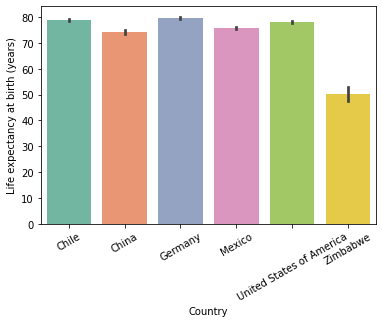

<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [51]:
# Show typical life expectancy for each country
sns.barplot(x = 'Country', y = 'Life expectancy at birth (years)', palette = 'Set2', data = df)
plt.xticks(rotation=30)
plt.figure(figsize=(20,10))
# plt.yscale('log') 
plt.show()
plt.clf()

### INTERPRETATION
Zimbabwe has  a low life expectancy compared to other countries

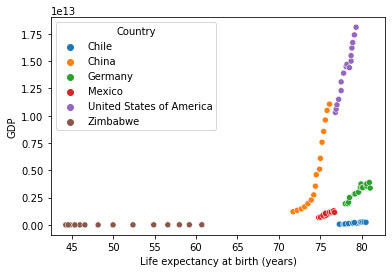

<Figure size 432x288 with 0 Axes>

In [10]:
# what is the relationship between life expectancy and GDP for each country(together)
sns.scatterplot(x = 'Life expectancy at birth (years)', y = 'GDP', hue='Country', data=df)
plt.show()
plt.clf()

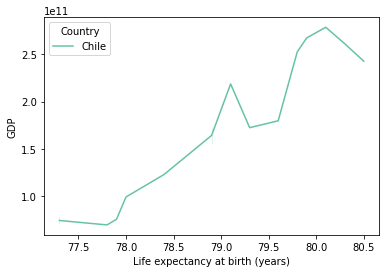

The correlation score for  Chile  is 0.9498766659254416


<Figure size 432x288 with 0 Axes>

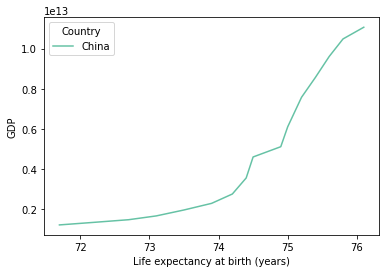

The correlation score for  China  is 0.9085255408648358


<Figure size 432x288 with 0 Axes>

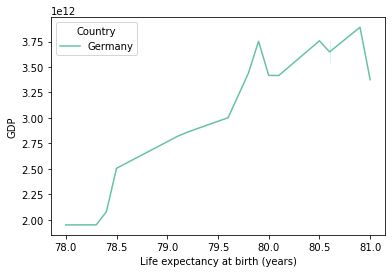

The correlation score for  Germany  is 0.932698898256127


<Figure size 432x288 with 0 Axes>

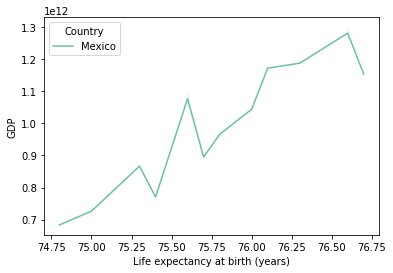

The correlation score for  Mexico  is 0.9322377167847082


<Figure size 432x288 with 0 Axes>

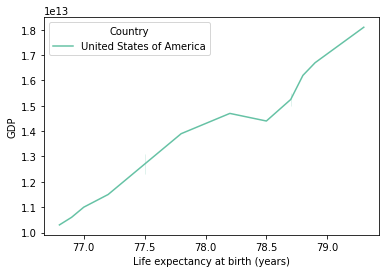

The correlation score for  United States of America  is 0.9817092382430257


<Figure size 432x288 with 0 Axes>

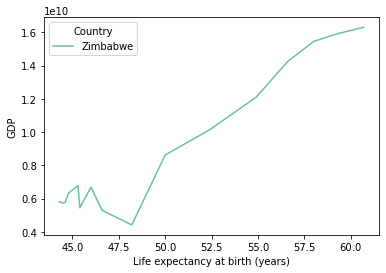

The correlation score for  Zimbabwe  is 0.9661998955858777


<Figure size 432x288 with 0 Axes>

In [11]:
# what is the relationship between life expectancy and GDP for each country separatly
for country in countries:
    country_data = df[df['Country'] == country]
    fig, ax = plt.subplots()
    sns.lineplot(x = 'Life expectancy at birth (years)', y = 'GDP', hue = 'Country',palette='Set2', data= country_data, ax=ax)
    plt.show()
    plt.clf()
    from scipy.stats import pearsonr
    corr, p = pearsonr( country_data['Life expectancy at birth (years)'],  country_data.GDP)
    print('The correlation score for ', country, ' is', corr)

### INTERPRETATION

Generally, a correlation greater than 0.3 indicates a linear association while a correlation greater than about 0.6 indicates a strong linear association. There's a strong linear correlation between GDP and LE for all countries with the United states being the strongest 

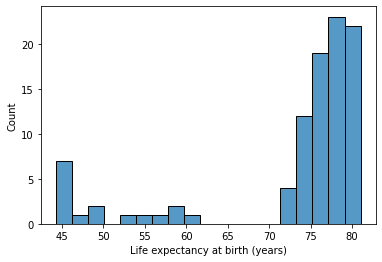

<Figure size 432x288 with 0 Axes>

In [21]:
# what is the distribution of life expectancy 
sns.histplot(df['Life expectancy at birth (years)'])
plt.show()
plt.clf()

### INTERPRETATION
Most countries have an approximate LE of 77 years

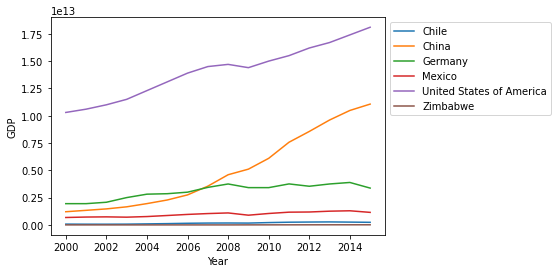

<Figure size 432x288 with 0 Axes>

In [36]:
# has GDP increased over time in the 6 nations?
ax = sns.lineplot(y='GDP', x ='Year', hue='Country',data=df)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.clf()

### INTERPRETATION
Only United States, and China saw a significant increase in their GDP from 2000 to 2014. The rest of the countries had slight increase and maintained their GDP over time

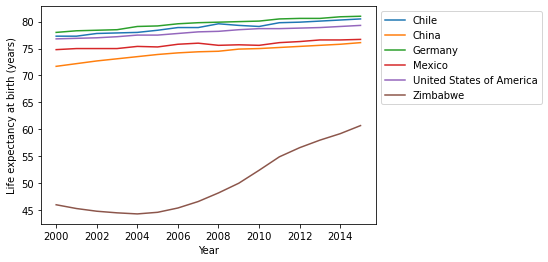

<Figure size 432x288 with 0 Axes>

In [37]:
#Has life expectancy increased over time in the six nations?
ax = sns.lineplot(y='Life expectancy at birth (years)', x ='Year', hue='Country',data=df)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()
plt.clf()

### INTERPRETATION
Only Zimbabwe has a significant increase in life expectancy. LE was extremely low between 2002 and 2006 and then started increasing but peaked at 60 years. The rest of the countries started high and maintained their LE over time

### CONCLUSION
This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.